In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

from shapely import wkt
import pyproj

import xarray as xr
import rioxarray as rx
import xrspatial.multispectral as ms

from pystac_client import Client
import stackstac
import planetary_computer

from dask_gateway import GatewayCluster

In [2]:
cluster = GatewayCluster()  # Creates the Dask Scheduler. Might take a minute.

client = cluster.get_client()

cluster.adapt(minimum=4, maximum=24)
print(cluster.dashboard_link)

https://pccompute.westeurope.cloudapp.azure.com/compute/services/dask-gateway/clusters/prod.8379a65a2ec2491787082f6537c276ba/status


In [3]:
df = pd.read_csv("../data/bathybase/bathy_lakes_aoi.csv")
df["geometry"] = df["geometry"].apply(wkt.loads)

gdf = gpd.GeoDataFrame(df, crs="epsg:4326")
gdf

,Name,Source,Lat,Lon,Mean Depth,Max Depth,Volume,Observation Source,geometry,file_location
0,Summit Lake,http://dnr.wi.gov/lakes/Documents/LakeMaps.aspx,45.373955,-89.207113,3.0,7.6,3393200,NaN,POINT (-89.20711 45.37395),../data/bathybase/bathy_tiffs/summit_lake.tiff
1,Green Lake,http://dnr.wi.gov/lakes/Documents/LakeMaps.aspx,43.809624,-88.997684,31.2,67.1,934184600,NaN,POINT (-88.99768 43.80962),../data/bathybase/bathy_tiffs/green_lake.tiff
2,Pesobic Lake,http://dnr.wi.gov/lakes/Documents/LakeMaps.aspx,45.212764,-89.681004,1.8,3.4,1101900,NaN,POINT (-89.68100 45.21276),../data/bathybase/bathy_tiffs/pesobic_lake.tiff
3,East Spring Lake,http://dnr.wi.gov/lakes/Documents/LakeMaps.aspx,43.813276,-89.302434,6.9,14.9,696900,NaN,POINT (-89.30243 43.81328),../data/bathybase/bathy_tiffs/east_spring_lake...
4,West Spring Lake,http://dnr.wi.gov/lakes/Documents/LakeMaps.aspx,43.815044,-89.305954,4.4,7.9,124800,NaN,POINT (-89.30595 43.81504),../data/bathybase/bathy_tiffs/west_spring_lake...
...,...,...,...,...,...,...,...,...,...,...
1259,Wakefield,http://www.mngeo.state.mn.us/chouse/water_lake...,44.994614,-93.035840,4.3,8.0,344300,GPS,POINT (-93.03584 44.99461),../data/bathybase/bathy_tiffs/wakefield.tiff
1260,Phalen,http://www.mngeo.state.mn.us/chouse/water_lake...,44.987629,-93.052802,23.3,91.0,18693100,ORIG MAP,POINT (-93.05280 44.98763),../data/bathybase/bathy_tiffs/phalen.tiff
1261,Beaver,http://www.mngeo.state.mn.us/chouse/water_lake...,44.973085,-93.004706,6.6,12.7,2194700,GPS,POINT (-93.00471 44.97309),../data/bathybase/bathy_tiffs/beaver.tiff
1262,East Vadnais,http://www.mngeo.state.mn.us/chouse/water_lake...,45.052149,-93.088270,25.0,57.9,39625600,ORIG MAP,POINT (-93.08827 45.05215),../data/bathybase/bathy_tiffs/east_vadnais.tiff


In [4]:
gdf.sort_values(by="Volume", ascending=False).head(10)

,Name,Source,Lat,Lon,Mean Depth,Max Depth,Volume,Observation Source,geometry,file_location
1165,Mille Lacs,http://www.mngeo.state.mn.us/chouse/water_lake...,46.238453,-93.643143,28.5,40.0,14784263200,ORIG MAP,POINT (-93.64314 46.23845),../data/bathybase/bathy_tiffs/mille_lacs.tiff
674,Winnibigoshish,http://www.mngeo.state.mn.us/chouse/water_lake...,47.450692,-94.186271,20.1,70.0,4615083900,TOPO MAP/DRG,POINT (-94.18627 47.45069),../data/bathybase/bathy_tiffs/winnibigoshish.tiff
299,Kabetogama,http://www.mngeo.state.mn.us/chouse/water_lake...,48.466016,-92.957456,24.9,78.0,2422512400,ORIG MAP,POINT (-92.95746 48.46602),../data/bathybase/bathy_tiffs/kabetogama.tiff
248,East Vermilion,http://www.mngeo.state.mn.us/chouse/water_lake...,47.847040,-92.333948,17.3,75.0,1952486800,ORIG MAP,POINT (-92.33395 47.84704),../data/bathybase/bathy_tiffs/east_vermilion.tiff
893,Pepin,http://www.mngeo.state.mn.us/chouse/water_lake...,44.497173,-92.278056,17.8,58.8,1820252000,ORIG MAP,POINT (-92.27806 44.49717),../data/bathybase/bathy_tiffs/pepin.tiff
260,Trout,http://www.mngeo.state.mn.us/chouse/water_lake...,47.973226,-92.319201,41.1,94.0,1322431800,ORIG MAP,POINT (-92.31920 47.97323),../data/bathybase/bathy_tiffs/trout.tiff
698,Gull,http://www.mngeo.state.mn.us/chouse/water_lake...,46.447971,-94.357223,32.0,80.0,1287852000,ORIG MAP,POINT (-94.35722 46.44797),../data/bathybase/bathy_tiffs/gull.tiff
249,West Vermilion,http://www.mngeo.state.mn.us/chouse/water_lake...,47.930257,-92.555012,21.6,50.0,990490100,ORIG MAP,POINT (-92.55501 47.93026),../data/bathybase/bathy_tiffs/west_vermilion.tiff
1,Green Lake,http://dnr.wi.gov/lakes/Documents/LakeMaps.aspx,43.809624,-88.997684,31.2,67.1,934184600,NaN,POINT (-88.99768 43.80962),../data/bathybase/bathy_tiffs/green_lake.tiff
601,Bemidji (main lake),http://www.mngeo.state.mn.us/chouse/water_lake...,47.503383,-94.847969,33.0,76.0,879722700,ORIG MAP,POINT (-94.84797 47.50338),../data/bathybase/bathy_tiffs/bemidji_main_lak...


In [5]:
winnibigoshish_tiff = gdf[gdf["Name"] == "Winnibigoshish"]["file_location"].values[0]
winnib = rx.open_rasterio(winnibigoshish_tiff, masked=True)

winnib

<xarray.DataArray (band: 1, y: 4506, x: 4287)>
[19317222 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 3.999e+05 3.999e+05 ... 4.213e+05 4.213e+05
  * y            (y) float64 5.267e+06 5.267e+06 ... 5.245e+06 5.245e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

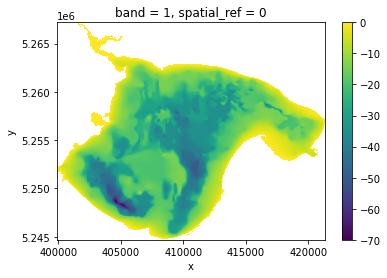

In [6]:
winnib.plot()

In [7]:
wgs84 = pyproj.CRS('EPSG:4326')
bounds = winnib.rio.transform_bounds(wgs84)
time = "2021-05-01/2021-10-01"

In [8]:
left, bottom, right, top = winnib.rio.transform_bounds(wgs84)

latitude = (bottom, top)
longitude = (left, right)

In [9]:
from display_map import display_map
display_map(latitude, longitude)

In [10]:
planetary_computer_stac = "https://planetarycomputer.microsoft.com/api/stac/v1"
catalog = Client.open(planetary_computer_stac)

In [11]:
%%time
collections = ["sentinel-2-l2a"]
items = catalog.search(
    collections=collections,
    bbox=bounds,
    datetime=time,
    query={"eo:cloud_cover": {"lt": 15}},
).get_all_items()
len(items)

CPU times: user 132 ms, sys: 3.34 ms, total: 136 ms
Wall time: 385 ms


35

In [12]:
signed_items = [planetary_computer.sign(item).to_dict() for item in items]

In [13]:
%%time
data = (
    stackstac.stack(
        signed_items,
        assets=["B04", "B03", "B02"],
        chunksize=4096,
        epsg=winnib.rio.crs.to_epsg(),
        resolution=10,
    )
    .where(lambda x : x > 0, other=np.nan)
    .assign_coords(band=lambda x: x.common_name.rename("band"))
)
data

CPU times: user 236 ms, sys: 16 ms, total: 252 ms
Wall time: 251 ms


,Array,Chunk
Bytes,180.20 GiB,128.00 MiB
Shape,"(35, 3, 10981, 20977)","(1, 1, 4096, 4096)"
Count,5898 Tasks,1890 Chunks
Type,float64,numpy.ndarray


In [14]:
minx, miny, maxx, maxy = winnib.rio.bounds()
minx, miny, maxx, maxy

(399878.24239996827, 5244676.947699969, 421312.91059999075, 5267204.857699947)

In [15]:
aoi = data.sel(x=slice(minx, maxx), y=slice(maxy, miny))
aoi

,Array,Chunk
Bytes,3.78 GiB,23.57 MiB
Shape,"(35, 3, 2253, 2144)","(1, 1, 1441, 2144)"
Count,6108 Tasks,210 Chunks
Type,float64,numpy.ndarray


In [16]:
aoi = aoi.persist()

In [17]:
median = aoi.median(dim="time")
median

<xarray.DataArray 'stackstac-b1825c2ad727d6936f51cdab29bfe3ce' (band: 3, y: 2253, x: 2144)>
dask.array<nanmedian, shape=(3, 2253, 2144), dtype=float64, chunksize=(1, 406, 1072), chunktype=numpy.ndarray>
Coordinates:
  * band                                     (band) <U5 'red' 'green' 'blue'
  * x                                        (x) float64 3.999e+05 ... 4.213e+05
  * y                                        (y) float64 5.267e+06 ... 5.245e+06
    s2:datatake_type                         <U8 'INS-NOBS'
    s2:saturated_defective_pixel_percentage  float64 0.0
    s2:product_type                          <U7 'S2MSI2A'
    constellation                            <U10 'Sentinel 2'
    instruments                              <U3 'msi'
    proj:epsg                                int64 32615
    s2:degraded_msi_data_percentage          float64 0.0
    proj:shape                               object {10980}
    gsd                                      int64 10
    title                                    (band) <U20 'Band 4 - Red - 10m'...
    common_name                              (band) <U5 'red' 'green' 'blue'
    center_wavelength                        (band) float64 0.665 0.56 0.49
    full_width_half_max                      (band) float64 0.038 0.045 0.098
    epsg                                     int64 26915

In [18]:
%%time
median = median.compute()

CPU times: user 208 ms, sys: 44.8 ms, total: 252 ms
Wall time: 1min 12s


In [19]:
image = ms.true_color(*median)

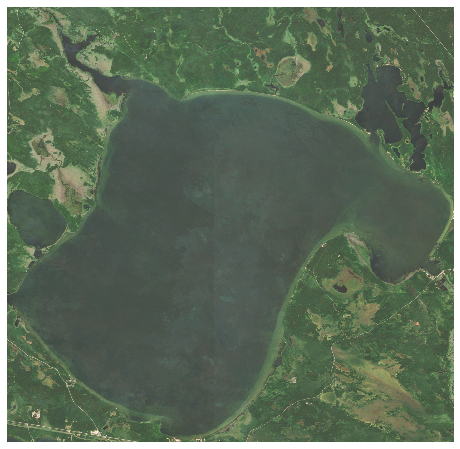

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

ax.set_axis_off()
image.plot.imshow(ax=ax)

In [21]:
monthly = aoi.groupby("time.month").median().compute()

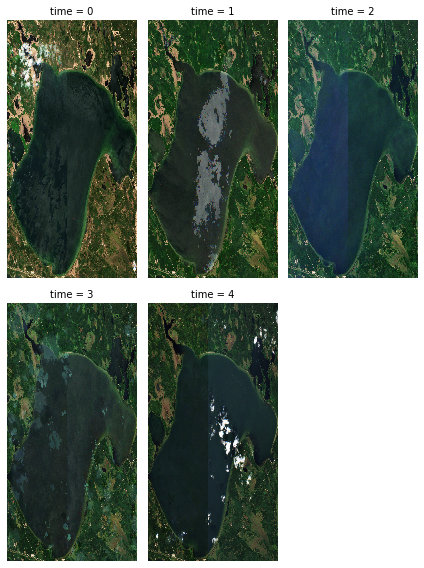

In [22]:
images = [ms.true_color(*x) for x in monthly]
images = xr.concat(images, dim="time")

g = images.plot.imshow(x="x", y="y", rgb="band", col="time", col_wrap=3, figsize=(6, 8))
for ax in g.axes.flat:
    ax.set_axis_off()

plt.tight_layout()

In [23]:
winnib.rio.crs

CRS.from_epsg(26915)

In [24]:
bands, height, width = median.shape
bands, height, width

(3, 2253, 2144)

In [25]:
winnib.rio.resolution()

(4.999922603224278, -4.999536173985721)

In [26]:
winnib_downsampled = winnib.rio.reproject(
    winnib.rio.crs,
    shape=(height, width),
    resampling=1
)

winnib_downsampled.rio.resolution()

(9.99710758879264, -9.99943954764237)

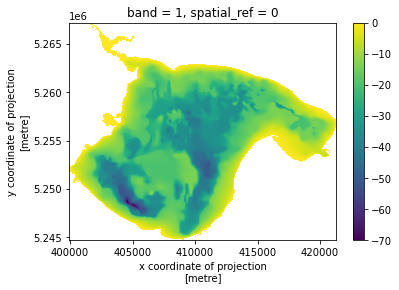

In [27]:
winnib_downsampled.plot()

In [28]:
winnib_prep = winnib_downsampled.sel({"band": 1}).reindex_like(median.sel({"band": "red"}), method="nearest")
winnib_prep.name = median.name
winnib_prep.assign_coords({"band": "bathy"})
winnib_prep

<xarray.DataArray 'stackstac-b1825c2ad727d6936f51cdab29bfe3ce' (y: 2253, x: 2144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * y            (y) float64 5.267e+06 5.267e+06 ... 5.245e+06 5.245e+06
  * x            (x) float64 3.999e+05 3.999e+05 ... 4.213e+05 4.213e+05
    band         int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [29]:
combined_xr = xr.concat(
    [
        median.reset_coords().sel({"band": "red"})[median.name],
        median.reset_coords().sel({"band": "blue"})[median.name],
        median.reset_coords().sel({"band": "green"})[median.name],
        winnib_prep
    ],
    dim="band"
)
combined_xr

<xarray.DataArray 'stackstac-b1825c2ad727d6936f51cdab29bfe3ce' (band: 4, y: 2253, x: 2144)>
array([[[356. , 407. , 380. , ..., 275. , 280. , 293. ],
        [378. , 382. , 370.5, ..., 290. , 279. , 274. ],
        [378. , 372. , 367. , ..., 284. , 273. , 284. ],
        ...,
        [201.5, 211.5, 218.5, ..., 305. , 276. , 286. ],
        [196. , 210. , 224. , ..., 294. , 287. , 289. ],
        [193.5, 196. , 211.5, ..., 288. , 296. , 290. ]],

       [[344.5, 346.5, 336.5, ..., 321. , 332. , 358. ],
        [357.5, 346.5, 362. , ..., 337. , 343. , 323. ],
        [344.5, 339. , 342.5, ..., 345. , 338. , 332. ],
        ...,
        [297. , 287. , 278.5, ..., 339. , 334. , 316. ],
        [275. , 279.5, 262.5, ..., 339. , 333. , 332. ],
        [258. , 256.5, 264.5, ..., 321. , 331. , 339. ]],

       [[475.5, 518.5, 531. , ..., 452. , 509. , 525. ],
        [501. , 533.5, 510. , ..., 473. , 492. , 485. ],
        [513. , 507. , 504. , ..., 485. , 474. , 478. ],
        ...,
        [328.5, 320. , 324. , ..., 476. , 470. , 461. ],
        [304. , 312. , 305. , ..., 492. , 471. , 466. ],
        [310.5, 303.5, 305.5, ..., 498. , 483. , 482. ]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]]])
Coordinates:
    spatial_ref  int64 0
  * band         (band) object 'red' 'blue' 'green' 1
  * x            (x) float64 3.999e+05 3.999e+05 ... 4.213e+05 4.213e+05
  * y            (y) float64 5.267e+06 5.267e+06 ... 5.245e+06 5.245e+06

In [30]:
masked_combined_xr = combined_xr.where(combined_xr.sel({"band": 1}).notnull())
masked_combined_xr

<xarray.DataArray 'stackstac-b1825c2ad727d6936f51cdab29bfe3ce' (band: 4, y: 2253, x: 2144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
    spatial_ref  int64 0
  * band         (band) object 'red' 'blue' 'green' 1
  * x            (x) float64 3.999e+05 3.999e+05 ... 4.213e+05 4.213e+05
  * y            (y) float64 5.267e+06 5.267e+06 ... 5.245e+06 5.245e+06

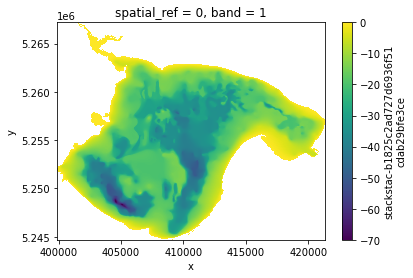

In [31]:
masked_combined_xr.sel({"band": 1}).plot()

In [32]:
image = ms.true_color(*masked_combined_xr.sel({"band": ["red", "green", "blue"]}))

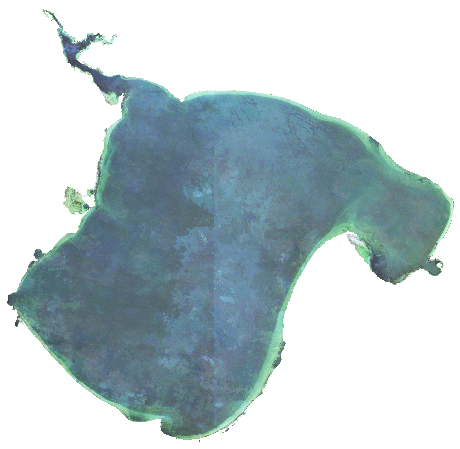

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.set_axis_off()
image.plot.imshow(ax=ax)

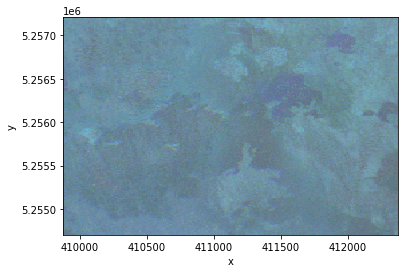

In [34]:
min_x = image.x.min()
max_x = image.x.max()
min_y = image.y.min()
max_y = image.y.max()

image.sel({"x": slice(min_x + (4 * 10 * 250), min_x + (5 * 10 * 250) - 1), "y": slice(max_y - (4 * 10 * 250), max_y - (5 * 10 * 250) + 1)}).plot.imshow()

In [35]:
import getpass
import azure.storage.blob
from azure.storage.blob import generate_blob_sas, AccountSasPermissions
from datetime import datetime, timedelta

In [36]:
erie_tif_blob_name = "erie_lld.tif"
account_name = "glintsolarexperiments"
container_name = "lakeerie"
account_key = getpass.getpass()

 ························································································


In [37]:
def get_sas_url(blob_name):
    url = f"https://{account_name}.blob.core.windows.net/{container_name}/{blob_name}"
    
    sas_token = generate_blob_sas(
        account_name=account_name,
        account_key=account_key,
        container_name=container_name,
        blob_name=blob_name,
        permission=AccountSasPermissions(read=True),
        expiry=datetime.utcnow() + timedelta(hours=12)
    )
    
    return f"{url}?{sas_token}"

In [38]:
erie_sas_url = get_sas_url(erie_tif_blob_name)
erie_bathy = rx.open_rasterio(erie_sas_url, masked=True)
erie_bathy.name = "bathy"
erie_bathy = erie_bathy.rename({"x": "longitude", "y": "latitude"})
erie_bathy

<xarray.DataArray 'bathy' (band: 1, latitude: 2401, longitude: 7201)>
[17289601 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * longitude    (longitude) float64 -84.0 -84.0 -84.0 ... -78.0 -78.0 -78.0
  * latitude     (latitude) float64 43.0 43.0 43.0 43.0 ... 41.0 41.0 41.0 41.0
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

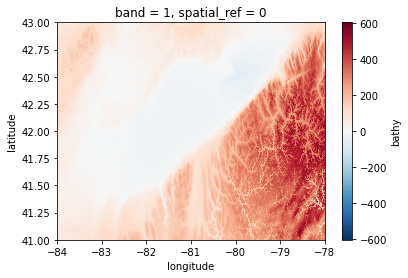

In [39]:
erie_bathy.plot()

In [40]:
erie_bathy.rio.crs

CRS.from_epsg(4269)

In [41]:
erie_bathy.rio.resolution()

(0.0008333333333, -0.0008333333333)

In [42]:
erie_shoreline_zip_name = "Lake_Erie_Shoreline.zip"
erie_shoreline_sas_url = get_sas_url(erie_shoreline_zip_name)
erie_shoreline_gdf = gpd.read_file(erie_shoreline_sas_url).to_crs(erie_bathy.rio.crs)
erie_shoreline_gdf

,OBJECTID,PERIMETER,LAKE_NAME,ID,ReferenceC,ShapeSTAre,ShapeSTLen,geometry
0,1,2445210.992,Lake Erie,1,25830205908,2.583021e+10,2.445211e+06,"POLYGON ((-79.24879 42.88283, -79.24883 42.878..."


In [43]:
erie_shoreline_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

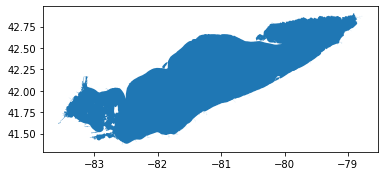

In [44]:
erie_shoreline_gdf.plot()

In [45]:
x_min = erie_bathy.longitude.min()
x_max = erie_bathy.longitude.max()
y_min = erie_bathy.latitude.min()
y_max = erie_bathy.latitude.max()

x_min, x_max, y_min, y_max

(<xarray.DataArray 'longitude' ()>
 array(-84.)
 Coordinates:
     spatial_ref  int64 0,
 <xarray.DataArray 'longitude' ()>
 array(-78.)
 Coordinates:
     spatial_ref  int64 0,
 <xarray.DataArray 'latitude' ()>
 array(41.)
 Coordinates:
     spatial_ref  int64 0,
 <xarray.DataArray 'latitude' ()>
 array(43.)
 Coordinates:
     spatial_ref  int64 0)

In [46]:
_, height, width = erie_bathy.shape

In [47]:
# taken from https://github.com/pydata/xarray/issues/501#issuecomment-126461466
from rasterio import features
from affine import Affine


def transform_from_latlon(lat, lon):
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale


def rasterize(shapes, coords, fill=np.nan, **kwargs):
    """Rasterize a list of (geometry, fill_value) tuples onto the given
    xray coordinates. This only works for 1d latitude and longitude
    arrays.
    """
    transform = transform_from_latlon(coords['latitude'], coords['longitude'])
    out_shape = (len(coords['latitude']), len(coords['longitude']))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    return xr.DataArray(raster, coords=coords, dims=('latitude', 'longitude'))


shapes = [(shape, n) for n, shape in enumerate(erie_shoreline_gdf.geometry)]

ds = xr.Dataset(coords={"longitude": np.linspace(x_min, x_max, num=width),
                        "latitude": np.linspace(y_max, y_min, num=height)})
ds = ds.reindex_like(erie_bathy)
ds["shoreline"] = rasterize(shapes, ds.coords)

ds = xr.combine_by_coords([erie_bathy, ds.shoreline])

ds

<xarray.Dataset>
Dimensions:      (band: 1, longitude: 7201, latitude: 2401)
Coordinates:
  * band         (band) int64 1
  * longitude    (longitude) float64 -84.0 -84.0 -84.0 ... -78.0 -78.0 -78.0
  * latitude     (latitude) float64 43.0 43.0 43.0 43.0 ... 41.0 41.0 41.0 41.0
    spatial_ref  int64 0
Data variables:
    bathy        (band, latitude, longitude) float32 ...
    shoreline    (latitude, longitude) float64 nan nan nan nan ... nan nan nan

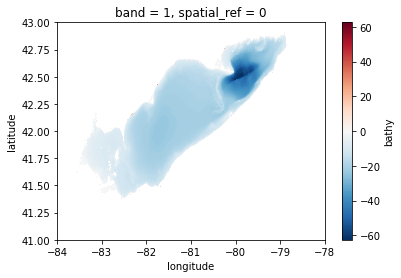

In [48]:
ds["bathy"] = ds.bathy.where(ds.shoreline.notnull())
ds.bathy.plot()

In [49]:
bounds = ds.rio.transform_bounds(wgs84)
bounds

(-84.00041389310239, 40.99958057750016, -77.99958410125488, 43.00042035318592)

In [50]:
left, bottom, right, top = bounds

latitude = (bottom, top)
longitude = (left, right)

In [51]:
display_map(latitude, longitude)

In [52]:
%%time
collections = ["sentinel-2-l2a"]
items = catalog.search(
    collections=collections,
    bbox=bounds,
    datetime=time,
    query={"eo:cloud_cover": {"lt": 15}},
).get_all_items()

signed_items = [planetary_computer.sign(item).to_dict() for item in items]

len(signed_items)

CPU times: user 559 ms, sys: 8.86 ms, total: 568 ms
Wall time: 2.17 s


365

In [53]:
# in this CRS we have geodesic resolution so this is in degrees
ds_resolution, _ = ds.rio.resolution()
ds_resolution

0.0008333333333

In [54]:
%%time
data = (
    stackstac.stack(
        signed_items,
        assets=["B04", "B03", "B02"],
        chunksize=4096,
        epsg=ds.rio.crs.to_epsg(),
        resolution=ds_resolution,
    )
    .where(lambda x : x > 0, other=np.nan)
    .assign_coords(band=lambda x: x.common_name.rename("band"))
)
data

CPU times: user 737 ms, sys: 0 ns, total: 737 ms
Wall time: 736 ms


,Array,Chunk
Bytes,247.83 GiB,106.84 MiB
Shape,"(365, 3, 3419, 8885)","(1, 1, 3419, 4096)"
Count,12048 Tasks,3285 Chunks
Type,float64,numpy.ndarray


In [55]:
minx, miny, maxx, maxy = ds.rio.bounds()
minx, miny, maxx, maxy

(-84.00041666666665, 40.99958333333334, -77.99958333357334, 43.000416666586645)

In [56]:
aoi = data.sel(x=slice(minx, maxx), y=slice(maxy, miny))
aoi

,Array,Chunk
Bytes,141.06 GiB,71.07 MiB
Shape,"(365, 3, 2401, 7201)","(1, 1, 2401, 3880)"
Count,14238 Tasks,2190 Chunks
Type,float64,numpy.ndarray


In [57]:
median = aoi.median(dim="time")
median

,Array,Chunk
Bytes,395.73 MiB,329.60 kiB
Shape,"(3, 2401, 7201)","(1, 343, 123)"
Count,72156 Tasks,1239 Chunks
Type,float64,numpy.ndarray


In [58]:
%%time
median = median.compute()
median

CPU times: user 6.24 s, sys: 260 ms, total: 6.5 s
Wall time: 9min 29s


<xarray.DataArray 'stackstac-404768cd42acff6f2c8cc3eb788512f3' (band: 3, y: 2401, x: 7201)>
array([[[ 614. ,  429. , 1064. , ...,  664.5,  298.5,  410.5],
        [ 569. , 1086. , 1050. , ...,  462. , 1272. ,  545.5],
        [ 644. , 1074. ,  920. , ...,  530.5,  467. ,  962. ],
        ...,
        [ 460. ,  897. ,  824. , ...,  178.5,  181.5,  177.5],
        [ 802. ,  716. ,  732. , ...,  252.5,  208.5,  179. ],
        [ 310. ,  527. ,  569. , ...,  234. ,  233. ,  216. ]],

       [[ 747. ,  777. , 1134. , ...,  813.5,  530.5,  656.5],
        [ 837. ,  901. ,  936. , ...,  718. , 1168. ,  901. ],
        [ 783. ,  860. ,  895. , ...,  707.5,  627. , 1083.5],
        ...,
        [ 680. ,  883. ,  896. , ...,  469. ,  465.5,  456.5],
        [ 819. ,  860. ,  857. , ...,  451. ,  484. ,  425. ],
        [ 505. ,  789. ,  816. , ...,  386.5,  431.5,  451. ]],

       [[ 506. ,  403. ,  798. , ...,  502.5,  330. ,  330.5],
        [ 490. ,  630. ,  595. , ...,  413.5, 1000.5,  800.5],
        [ 462. ,  630. ,  559. , ...,  423.5,  458. ,  679.5],
        ...,
        [ 402. ,  544. ,  554. , ...,  187.5,  200.5,  179. ],
        [ 509. ,  517. ,  516. , ...,  264. ,  214.5,  182. ],
        [ 291. ,  417. ,  439. , ...,  236. ,  210.5,  220.5]]])
Coordinates:
  * band                                     (band) <U5 'red' 'green' 'blue'
  * x                                        (x) float64 -84.0 -84.0 ... -78.0
  * y                                        (y) float64 43.0 43.0 ... 41.0 41.0
    s2:datatake_type                         <U8 'INS-NOBS'
    s2:saturated_defective_pixel_percentage  float64 0.0
    s2:product_type                          <U7 'S2MSI2A'
    constellation                            <U10 'Sentinel 2'
    instruments                              <U3 'msi'
    s2:degraded_msi_data_percentage          float64 0.0
    sat:orbit_state                          <U10 'descending'
    proj:shape                               object {10980}
    gsd                                      int64 10
    title                                    (band) <U20 'Band 4 - Red - 10m'...
    common_name                              (band) <U5 'red' 'green' 'blue'
    center_wavelength                        (band) float64 0.665 0.56 0.49
    full_width_half_max                      (band) float64 0.038 0.045 0.098
    epsg                                     int64 4269

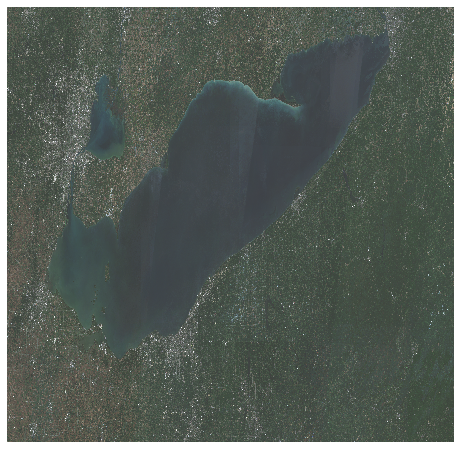

In [59]:
image = ms.true_color(*median)

fig, ax = plt.subplots(figsize=(8, 8))

ax.set_axis_off()
image.plot.imshow(ax=ax)

In [60]:
monthly = aoi.groupby("time.month").median().compute()

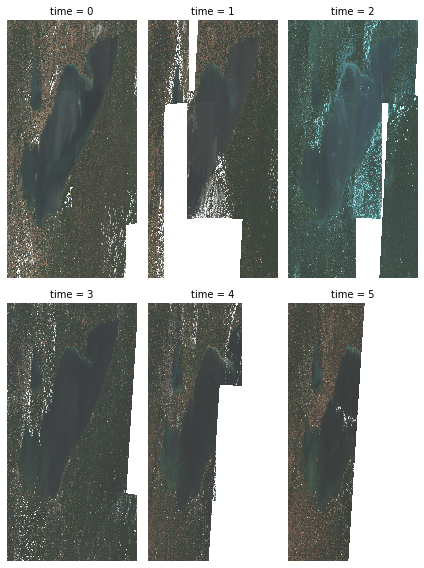

In [61]:
images = [ms.true_color(*x) for x in monthly]
images = xr.concat(images, dim="time")

g = images.plot.imshow(x="x", y="y", rgb="band", col="time", col_wrap=3, figsize=(6, 8))
for ax in g.axes.flat:
    ax.set_axis_off()

plt.tight_layout()

In [62]:
median = median.rename({"x": "longitude", "y": "latitude"})
median

<xarray.DataArray 'stackstac-404768cd42acff6f2c8cc3eb788512f3' (band: 3, latitude: 2401, longitude: 7201)>
array([[[ 614. ,  429. , 1064. , ...,  664.5,  298.5,  410.5],
        [ 569. , 1086. , 1050. , ...,  462. , 1272. ,  545.5],
        [ 644. , 1074. ,  920. , ...,  530.5,  467. ,  962. ],
        ...,
        [ 460. ,  897. ,  824. , ...,  178.5,  181.5,  177.5],
        [ 802. ,  716. ,  732. , ...,  252.5,  208.5,  179. ],
        [ 310. ,  527. ,  569. , ...,  234. ,  233. ,  216. ]],

       [[ 747. ,  777. , 1134. , ...,  813.5,  530.5,  656.5],
        [ 837. ,  901. ,  936. , ...,  718. , 1168. ,  901. ],
        [ 783. ,  860. ,  895. , ...,  707.5,  627. , 1083.5],
        ...,
        [ 680. ,  883. ,  896. , ...,  469. ,  465.5,  456.5],
        [ 819. ,  860. ,  857. , ...,  451. ,  484. ,  425. ],
        [ 505. ,  789. ,  816. , ...,  386.5,  431.5,  451. ]],

       [[ 506. ,  403. ,  798. , ...,  502.5,  330. ,  330.5],
        [ 490. ,  630. ,  595. , ...,  413.5, 1000.5,  800.5],
        [ 462. ,  630. ,  559. , ...,  423.5,  458. ,  679.5],
        ...,
        [ 402. ,  544. ,  554. , ...,  187.5,  200.5,  179. ],
        [ 509. ,  517. ,  516. , ...,  264. ,  214.5,  182. ],
        [ 291. ,  417. ,  439. , ...,  236. ,  210.5,  220.5]]])
Coordinates:
  * band                                     (band) <U5 'red' 'green' 'blue'
  * longitude                                (longitude) float64 -84.0 ... -78.0
  * latitude                                 (latitude) float64 43.0 ... 41.0
    s2:datatake_type                         <U8 'INS-NOBS'
    s2:saturated_defective_pixel_percentage  float64 0.0
    s2:product_type                          <U7 'S2MSI2A'
    constellation                            <U10 'Sentinel 2'
    instruments                              <U3 'msi'
    s2:degraded_msi_data_percentage          float64 0.0
    sat:orbit_state                          <U10 'descending'
    proj:shape                               object {10980}
    gsd                                      int64 10
    title                                    (band) <U20 'Band 4 - Red - 10m'...
    common_name                              (band) <U5 'red' 'green' 'blue'
    center_wavelength                        (band) float64 0.665 0.56 0.49
    full_width_half_max                      (band) float64 0.038 0.045 0.098
    epsg                                     int64 4269

In [63]:
erie_prep = ds.bathy.sel({"band": 1}).reindex_like(median.sel({"band": "red"}), method="nearest")
erie_prep.name = median.name
erie_prep.assign_coords({"band": "bathy"})
erie_prep

<xarray.DataArray 'stackstac-404768cd42acff6f2c8cc3eb788512f3' (latitude: 2401, longitude: 7201)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude     (latitude) float64 43.0 43.0 43.0 43.0 ... 41.0 41.0 41.0 41.0
  * longitude    (longitude) float64 -84.0 -84.0 -84.0 ... -78.0 -78.0 -78.0
    band         int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [64]:
combined_erie = xr.concat(
    [
        median.reset_coords().sel({"band": "red"})[median.name],
        median.reset_coords().sel({"band": "blue"})[median.name],
        median.reset_coords().sel({"band": "green"})[median.name],
        erie_prep
    ],
    dim="band"
)
combined_erie

<xarray.DataArray 'stackstac-404768cd42acff6f2c8cc3eb788512f3' (band: 4, latitude: 2401, longitude: 7201)>
array([[[ 614. ,  429. , 1064. , ...,  664.5,  298.5,  410.5],
        [ 569. , 1086. , 1050. , ...,  462. , 1272. ,  545.5],
        [ 644. , 1074. ,  920. , ...,  530.5,  467. ,  962. ],
        ...,
        [ 460. ,  897. ,  824. , ...,  178.5,  181.5,  177.5],
        [ 802. ,  716. ,  732. , ...,  252.5,  208.5,  179. ],
        [ 310. ,  527. ,  569. , ...,  234. ,  233. ,  216. ]],

       [[ 506. ,  403. ,  798. , ...,  502.5,  330. ,  330.5],
        [ 490. ,  630. ,  595. , ...,  413.5, 1000.5,  800.5],
        [ 462. ,  630. ,  559. , ...,  423.5,  458. ,  679.5],
        ...,
        [ 402. ,  544. ,  554. , ...,  187.5,  200.5,  179. ],
        [ 509. ,  517. ,  516. , ...,  264. ,  214.5,  182. ],
        [ 291. ,  417. ,  439. , ...,  236. ,  210.5,  220.5]],

       [[ 747. ,  777. , 1134. , ...,  813.5,  530.5,  656.5],
        [ 837. ,  901. ,  936. , ...,  718. , 1168. ,  901. ],
        [ 783. ,  860. ,  895. , ...,  707.5,  627. , 1083.5],
        ...,
        [ 680. ,  883. ,  896. , ...,  469. ,  465.5,  456.5],
        [ 819. ,  860. ,  857. , ...,  451. ,  484. ,  425. ],
        [ 505. ,  789. ,  816. , ...,  386.5,  431.5,  451. ]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]]])
Coordinates:
    spatial_ref  int64 0
  * band         (band) object 'red' 'blue' 'green' 1
  * longitude    (longitude) float64 -84.0 -84.0 -84.0 ... -78.0 -78.0 -78.0
  * latitude     (latitude) float64 43.0 43.0 43.0 43.0 ... 41.0 41.0 41.0 41.0

In [65]:
masked_combined_erie = combined_erie.where(combined_erie.sel({"band": 1}).notnull())
masked_combined_erie

<xarray.DataArray 'stackstac-404768cd42acff6f2c8cc3eb788512f3' (band: 4, latitude: 2401, longitude: 7201)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
    spatial_ref  int64 0
  * band         (band) object 'red' 'blue' 'green' 1
  * longitude    (longitude) float64 -84.0 -84.0 -84.0 ... -78.0 -78.0 -78.0
  * latitude     (latitude) float64 43.0 43.0 43.0 43.0 ... 41.0 41.0 41.0 41.0

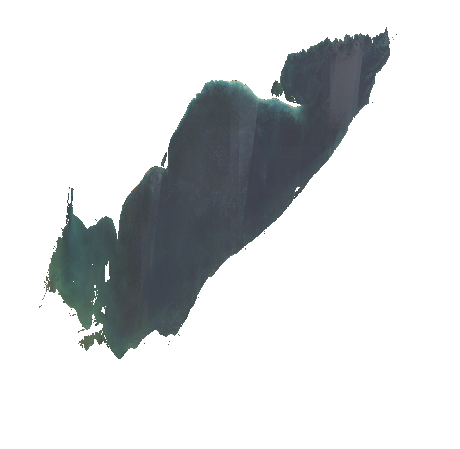

In [66]:
image = ms.true_color(*masked_combined_erie.sel({"band": ["red", "green", "blue"]}).rename({"longitude": "x", "latitude": "y"}))

fig, ax = plt.subplots(figsize=(8, 8))

ax.set_axis_off()
image.plot.imshow(ax=ax)

In [87]:
erie_prep.name = image.name
erie_prep["band"] = "bathy"
combined_erie_truecolor = xr.concat(
    [
        image.reset_coords().sel({"band": 0})[image.name],
        image.reset_coords().sel({"band": 1})[image.name],
        image.reset_coords().sel({"band": 2})[image.name],
        erie_prep.rename({"longitude": "x", "latitude": "y"})
    ],
    dim="band"
)
combined_erie_truecolor = combined_erie_truecolor.where(combined_erie_truecolor.sel({"band": "bathy"}).notnull())
combined_erie_truecolor

<xarray.DataArray 'true_color' (band: 4, y: 2401, x: 7201)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * y            (y) float64 43.0 43.0 43.0 43.0 43.0 ... 41.0 41.0 41.0 41.0
  * x            (x) float64 -84.0 -84.0 -84.0 -84.0 ... -78.0 -78.0 -78.0 -78.0
  * band         (band) object 0 1 2 'bathy'

In [88]:
connection_string = getpass.getpass()
container_client = azure.storage.blob.ContainerClient.from_connection_string(
    connection_string, container_name=container_name
)

 ·······································································································································································································································


In [93]:
import io

with io.BytesIO() as buffer:
    combined_erie_truecolor.rio.to_raster(buffer, driver="GTiff")
    buffer.seek(0)
    blob_client = container_client.get_blob_client("combined_erie_truecolor.tif")
    blob_client.upload_blob(buffer, overwrite=True)

## Close Cluster

In [94]:
client.close()
cluster.close()